## Appearance: Axes, Tricks and Grids

### The Canvas: Axis Limits and aspect

In [2]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from matplotlib.ticker import MultipleLocator

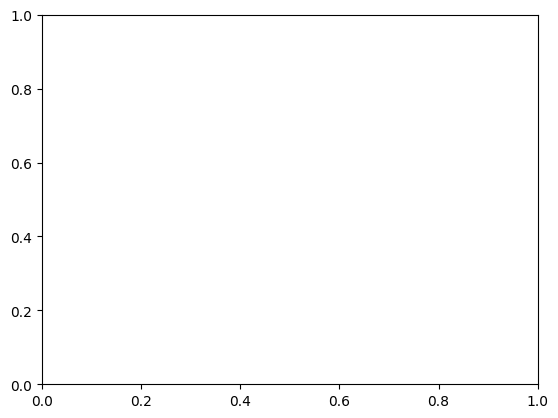

In [3]:
# Start from the most basic figure
fig, ax = plt.figure(), plt.axes()

See that the default canvas has not ratio 1 (squared). We can define `figsize` for the figure and axes dimensions but we can also use `set_aspect` method.

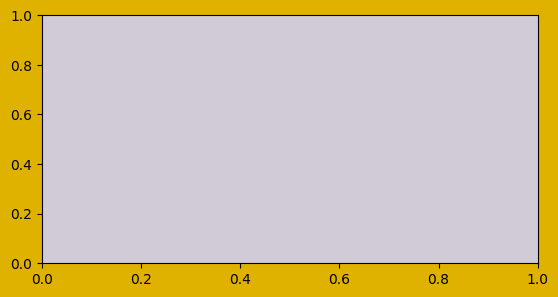

In [4]:
fig, ax = plt.figure(facecolor='#DFB200'), plt.axes(facecolor='#D1CBD7')
# ax.set_aspect('equal')
ax.set_aspect(0.5)

Usually we leave matplotlib to define the limits of the axes. (Calculated based on the data we pass trough) But it is possible to define them:
* `set_xlim()`
* `set_ylim()`

👁️ Messing around with this limits can make data dissapear.<br>
We can also retrieve those automate limits by using this methods:
* `get_xlim()`
* `get_ylim()`

Le us play around with this methods, creating colour filled areas with `fill_between()` method.

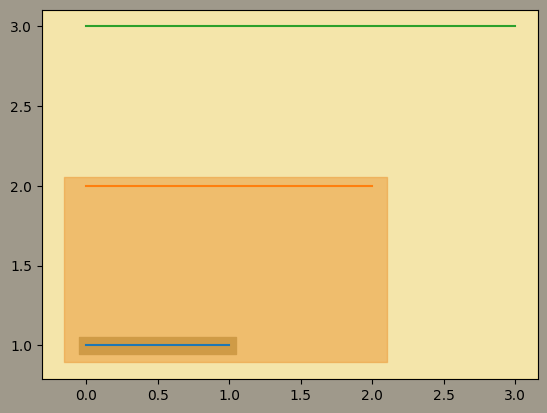

In [5]:
fig, ax = plt.figure(facecolor='#9F998B'), plt.axes()
colors_list = ['#9F998B','#F2884B','#DFB200','#D1CBD7']

for i in range(1,4):
  j = i -1
  ax.plot([0,i],[i,i])
  bottom_y, top_y = ax.get_ylim()
  left_x, right_x = ax.get_xlim()
  ax.fill_between(x=[left_x,right_x],
                  y1 = bottom_y,
                  y2 = top_y,
                  alpha = 1/i,
                  color=colors_list[j])

# The last iteration stretches automatically limits
# Avoid it
ax.set_ylim(bottom_y, top_y)
ax.set_xlim(left_x,right_x); # ; eliminates the numbers and text in the console

In case we need to, we can make our plot elements to break past the limits of the axes. Inside the function `ax.plot()` we can toggle `clip_on = False`. This argument controls how the objects behave respect the limits.

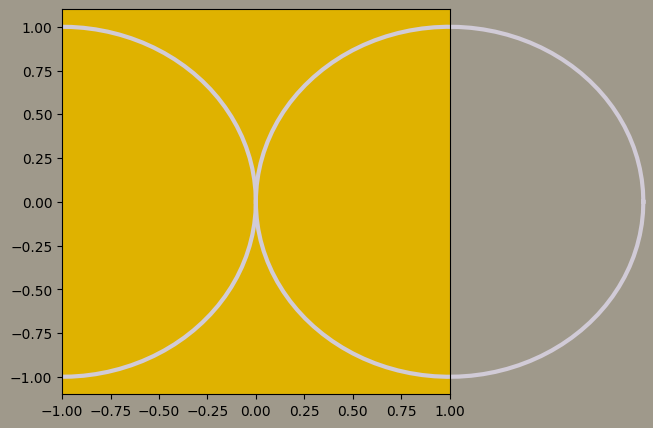

In [6]:
fig, ax = plt.figure(figsize=(5,5), facecolor='#9F998B'), plt.axes(facecolor='#DFB200')

# Create a circle
u = np.linspace(0,2*np.pi, 100)
x = np.cos(u)
y = np.sin(u)

ax.plot(x-1,y,color='#D1CBD7', linewidth=3)
ax.plot(x+1,y,color='#D1CBD7', linewidth=3, clip_on=False)

ax.set_xlim(-1,1); # Force the circle to be out the limits


In this case you can see that the figure container adapts itself to the data. Even if we set the figsize previuosly. But the axis limits remain set as (-1,1)

### Spines: Axis Lines and Labels

We, of course, can change (even make disappear) the lines that define axis.
With `ax.axis('off')` we just eliminate everything but the figure

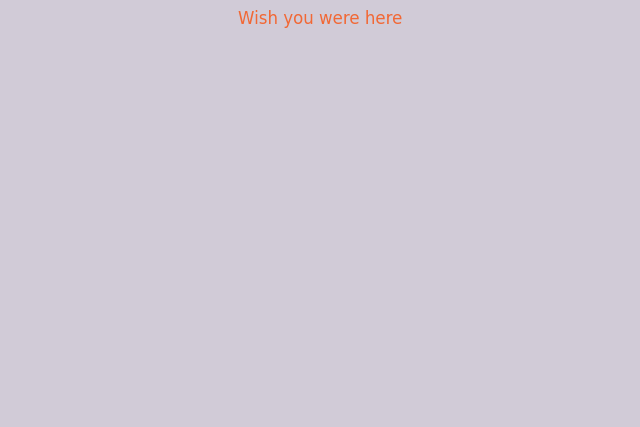

In [7]:
fig, ax = plt.figure(figsize=(8,5), facecolor='#D1CBD7'), plt.axes(facecolor='#DFB200')
ax.set_title('Wish you were here', color='#F26835')
ax.axis('off');

Of course we can access and change each spine individually.

Using `ax.spines.set_visible(False)`

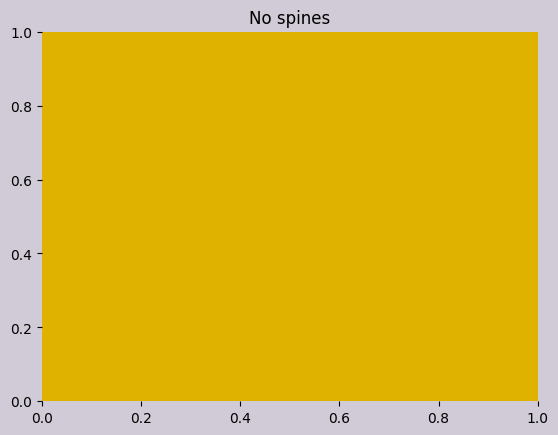

In [8]:
fig, ax = plt.figure(facecolor='#D1CBD7'), plt.axes(facecolor='#DFB200')
ax.set_title('No spines')
for spine in 'bottom', 'left', 'top', 'right':
  ax.spines[spine].set_visible(False)

There are some other methods to work with spines:
* `set_position()`
* `set_color()`
* `set_linewidth()`

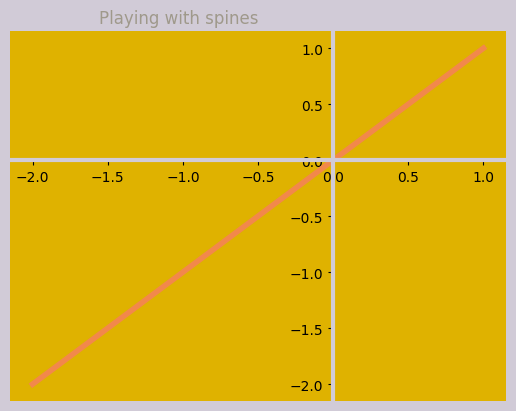

In [9]:
fig, ax = plt.figure(facecolor='#D1CBD7'), plt.axes(facecolor='#DFB200')
ax.set_title('Playing with spines', fontdict={'fontsize':12, 'color':'#9F998B', 'horizontalalignment':'right'})
ax.plot([-2,1], [-2,1], color='#F2884B', linewidth=4)
for spine in 'top', 'right':
  ax.spines[spine].set_visible(False)
for spine in 'bottom', 'left':
  ax.spines[spine].set_position('zero')
  ax.spines[spine].set_color('#D1CBD7')
  ax.spines[spine].set_linewidth(3);

plt.savefig('spines.pdf');

### Ticks: what the spines measure

There are two ways for access and change the info display in the ticks (the ticks and its labels). The first ones should apply direct to as ax.:
* `set_xticks`
* `set_xtickslabels`

And, of course, we can use the general:
* `set_ticks`
* `set_ticklabels`


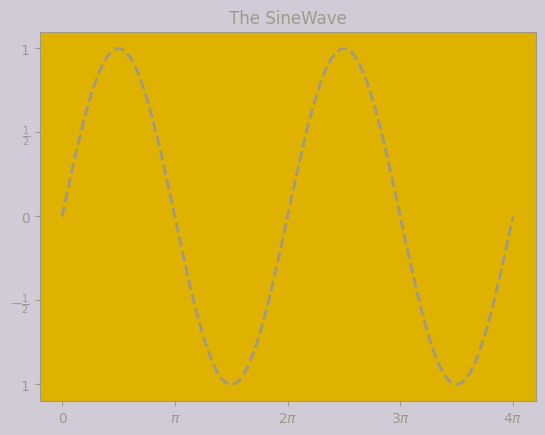

In [10]:
# Create a wave line
x = np.linspace(0, np.pi * 4, 100)

fig, ax = plt.figure(facecolor='#D1CBD7'), plt.axes(facecolor='#DFB200')
ax.plot(x, np.sin(x), color='#9F998B', linewidth=2, linestyle='dashed')
ax.set_title('The SineWave', color='#9F998B')

for spine in 'bottom', 'left', 'top', 'right':
  ax.spines[spine].set_color('#9F998B')
ax.xaxis.set_tick_params(color='#9F998B')
ax.yaxis.set_tick_params(color='#9F998B')

# X Ticks
ax.xaxis.set_ticks([0,np.pi,np.pi*2,np.pi*3, np.pi*4])
ax.xaxis.set_ticklabels([0,r'$\pi$', r'$2\pi$', r'$3\pi$', r'$4\pi$'], color='#9F998B')

# Y Ticks
ax.set_yticks([-1,-0.5,0,0.5,1])
ax.set_yticklabels([1, r'$-\frac{1}{2}$', 0, r'$\frac{1}{2}$', 1], color='#9F998B');

# Save vector PDF
plt.savefig('theSineWave.pdf');

For the special mathematical characters I am using [LaTeXStrings](https://juliadatascience.io/using-latexstrings.jl)

When you pass an empty array to `set_ticks()` there are no ticks.

There is also a way to get two levels of tiks, *majors*, and *minors* (these ones are deactivated by default)


In [24]:
"""
Before plotting we are going to create a small dataset.
With temporary stats of the Week 15 NFL game:
Minnesota Vikings at Cincinnaty Bengals
16/12/2023
3:05 pm ET
"""
minVikings_colors = ['#4F2683', '#FFC62F']
cinBengals_colors = ['#FB4F14', '#000000']

runningStats = {
    'Name': ['T.Chandler', 'N.Mullens', 'K.Nwangwu', 'C.Brown', 'J.Mixon', 'T.Williams'],
    'Runs': [16, 3, 1, 5, 4, 1],
    'Yards': [87, 5, 1, 14, 23, 10]
}

df = pd.DataFrame(runningStats)

# Add a column with the average yards per run
df['Avg'] = round(df['Yards']/df['Runs'], 1)
# Asign teams
df['Team'] = ['Min','Min','Min','Cin','Cin','Cin']

# Asign color_1 and color_2 to each player
df['colors_1'] = df['Team'].apply(lambda x: minVikings_colors[0] if x == 'Min' else cinBengals_colors[1])
df['colors_2'] = df['Team'].apply(lambda x: minVikings_colors[1] if x == 'Min' else cinBengals_colors[0])

df_Avg = df[['Name', 'Avg']]
df = df.sort_values(by='Avg')
df, df_Avg


(         Name  Runs  Yards   Avg Team colors_1 colors_2
 2   K.Nwangwu     1      1   1.0  Min  #4F2683  #FFC62F
 1   N.Mullens     3      5   1.7  Min  #4F2683  #FFC62F
 3     C.Brown     5     14   2.8  Cin  #000000  #FB4F14
 0  T.Chandler    16     87   5.4  Min  #4F2683  #FFC62F
 4     J.Mixon     4     23   5.8  Cin  #000000  #FB4F14
 5  T.Williams     1     10  10.0  Cin  #000000  #FB4F14,
          Name   Avg
 0  T.Chandler   5.4
 1   N.Mullens   1.7
 2   K.Nwangwu   1.0
 3     C.Brown   2.8
 4     J.Mixon   5.8
 5  T.Williams  10.0)

Let us create a horizontal bar chart, with the average yards for the six players. And we are going to play also with the bar objects.

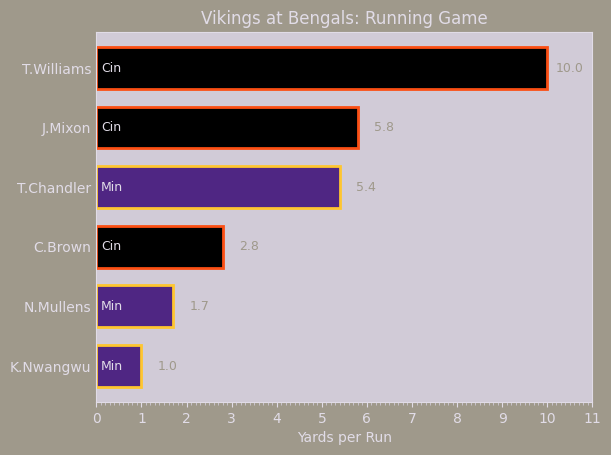

In [25]:
fig, ax = plt.figure(facecolor='#9F998B'), plt.axes(facecolor='#D1CBD7')

df['Avg'].plot.barh(ax = ax,
             color = df['colors_1'],
             edgecolor= df['colors_2'],
             linewidth = 2,
             width = 0.7)

ax.yaxis.set_tick_params(length=0, which='major', rotation = 0)
ax.set_yticklabels(df['Name'], color='#E1DCE7')

for spine in 'bottom', 'left', 'top', 'right':
  ax.spines[spine].set_color('#E1DCE7')

xlim0, xlim1 = 0, round(df['Avg'].max()) + 1
ax.set_xlim([xlim0 , xlim1])
ax.set_xticks(range(xlim0, xlim1 + 1))
# Change both the ticks and ticklabels color
ax.tick_params(axis='x', colors='#E1DCE7')

ax.xaxis.set_minor_locator(MultipleLocator(1/10))
ax.xaxis.set_tick_params(length=2, which='minor', color='#D1CBD7')
ax.set_xlabel('Yards per Run', color='#E1DCE7')
ax.set_title('Vikings at Bengals: Running Game', color='#E1DCE7');

# Adding the avergae number for each player
for i, v in enumerate(df['Avg']):
    ax.text(v + 0.8, i, str(round(v, 2)), color='#9F998B', va='center', ha='right', fontsize=9)
for i, team in enumerate(df['Team']):
    ax.text(0.1, i, team, color='#E1DCE7', va='center', ha='left', fontsize=9)

# Save the vector PDF
plt.savefig('runsAVG.pdf');

Before start playing with titles, fonts and other styles configuration there is one more style we can use in our charts:

 **Grids**

 Method for both axis is `grid()`
 For individually change any of both:

 * `yaxis.grid()`
 * `xaxis.grid()`

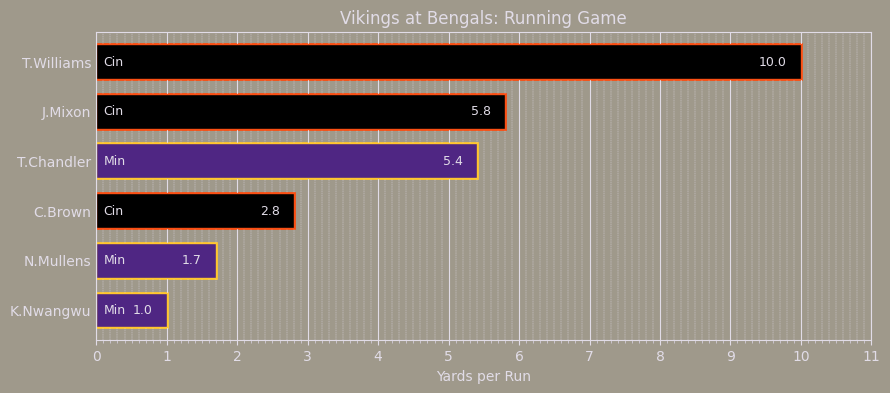

In [62]:
fig, ax = plt.figure(figsize=(10,4), facecolor='#9F998B'), plt.axes(facecolor='#9F998B')

df['Avg'].plot.barh(ax = ax,
             color = df['colors_1'],
             edgecolor= df['colors_2'],
             linewidth = 2,
             width = 0.7)



for spine in 'bottom', 'left', 'top', 'right':
  ax.spines[spine].set_color('#E1DCE7')

xlim0, xlim1 = 0, round(df['Avg'].max()) + 1
ax.set_xlim([xlim0 , xlim1])
ax.set_xticks(range(xlim0, xlim1 + 1))
# Change both the ticks and ticklabels color
ax.tick_params(axis='x', colors='#E1DCE7')

ax.xaxis.set_minor_locator(MultipleLocator(1/10))
df['Avg'].plot.barh(ax=ax,
                    color=df['colors_1'],
                    edgecolor=df['colors_2'],
                    linewidth=1,
                    width=0.7, # Increase this value to make the bars wider
                    zorder=2)

ax.yaxis.set_tick_params(length=0, which='major', rotation = 0)
ax.set_yticklabels(df['Name'], color='#E1DCE7')

ax.xaxis.grid(True, which='major', color='#E1DCE7', linestyle='-', zorder=1)
ax.xaxis.grid(True, which='minor', color='#E1DCE7', linestyle='--', linewidth=0.3, zorder=1)

ax.xaxis.set_tick_params(length=2, which='minor', color='#D1CBD7')
ax.set_xlabel('Yards per Run', color='#E1DCE7')
ax.set_title('Vikings at Bengals: Running Game', color='#E1DCE7')

# Adding the average number for each player
for i, v in enumerate(df['Avg']):
    ax.text(v - 0.2, i, str(round(v, 2)), color='#E1DCE7', va='center', ha='right', fontsize=9, zorder=4)
for i, team in enumerate(df['Team']):
    ax.text(0.1, i, team, color='#E1DCE7', va='center', ha='left', fontsize=9,  zorder=4)

# Save the vector PDF
plt.savefig('runsAVG_Grid.pdf')

### Maybe it worth a thousand words, or not...

This simple way using `files.upload()` from google.colab to upload files to the Colab environment. In this case with are going to upload a family of fonts to  use it in the next plots.

In [50]:
from google.colab import files
uploaded = files.upload()

Saving GOTHIC.TTF to GOTHIC.TTF
Saving GOTHICB.TTF to GOTHICB.TTF
Saving GOTHICBI.TTF to GOTHICBI.TTF
Saving GOTHICI.TTF to GOTHICI.TTF


In [51]:
# using font_manager() to get fonts into matplotlib
from matplotlib import font_manager

font_manager.fontManager.addfont('/content/GOTHIC.TTF')  # replace with the path to your font file
font_manager.fontManager.addfont('/content/GOTHICB.TTF')
font_manager.fontManager.addfont('/content/GOTHICBI.TTF')
font_manager.fontManager.addfont('/content/GOTHICI.TTF')

And now, we are going to plot with our uploaded font. We can set thje entire envornment with:
<br> `plt.rcParams['font.family'] = 'Century Gothic'`

Or using `fontproperties='Century Gothic'` in which instances we want.

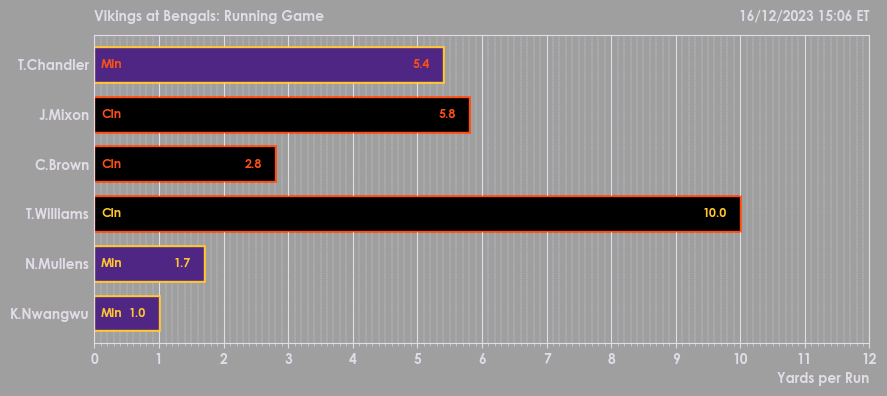

In [81]:
from matplotlib.font_manager import FontProperties

df = df.sort_values(by='Yards')
fig, ax = plt.figure(figsize=(10,4), facecolor='#9F9F9F'), plt.axes(facecolor='#9F9F9F')

df['Avg'].plot.barh(ax = ax,
             color = df['colors_1'],
             edgecolor= df['colors_2'],
             linewidth = 2,
             width = 0.7)

plt.rcParams['font.family'] = 'Century Gothic'
font = FontProperties()
font.set_family('Century Gothic')
font.set_weight('bold')

for spine in 'bottom', 'left', 'top', 'right':
  ax.spines[spine].set_color('#E1DCE7')

xlim0, xlim1 = 0, round(df['Avg'].max()) + 1
ax.set_xlim([xlim0 , xlim1])
ax.set_xticks(range(xlim0, xlim1 + 2))
# Change both the ticks and ticklabels color
ax.tick_params(axis='x', colors='#E1DCE7')
for label in ax.get_xticklabels():
    label.set_fontproperties(font)

ax.xaxis.set_minor_locator(MultipleLocator(1/10))
df['Avg'].plot.barh(ax=ax,
                    color=df['colors_1'],
                    edgecolor=df['colors_2'],
                    linewidth=1,
                    width=0.7, # Increase this value to make the bars wider
                    zorder=2)

ax.yaxis.set_tick_params(length=0, which='major', rotation = 0)
ax.set_yticklabels(df['Name'], color='#E1DCE7', fontproperties=font)

ax.xaxis.grid(True, which='major', color='#E1DCE7', linestyle='-', zorder=1)
ax.xaxis.grid(True, which='minor', color='#E1DCE7', linestyle='--', linewidth=0.3, zorder=1)

ax.xaxis.set_tick_params(length=2, which='minor', color='#D1CBD7')
ax.set_xlabel('Yards per Run', color='#E1DCE7', loc='right', fontproperties=font)
ax.set_title('Vikings at Bengals: Running Game',
             color='#E1DCE7',
             pad=10, # Added some padding to separate from top spine
             loc='Left', # Moving title to the left
             fontproperties=font
             )
# Add another title in the right side
ax.set_title('16/12/2023 15:06 ET',
             color='#E1DCE7',
             loc='right',
             pad=10,
             fontsize=10,
             fontproperties=font)
# Adding the average number for each player
for i, v in enumerate(df['Avg']):
    ax.text(v - 0.2, i, str(round(v, 2)), color=df['colors_2'][i], va='center', ha='right',
            fontsize=9, zorder=4, fontproperties=font)
for i, team in enumerate(df['Team']):
    ax.text(0.1, i, team, color=df['colors_2'][i], va='center', ha='left',
            fontsize=9,  zorder=4, fontproperties=font)

# Save the vector PDF
plt.savefig('runsAVG_SomeText.pdf')